# Impact of texture in 2D powder diffraction patterns

## Using filters during 2D data integration

In this notebook, we demonstrate the impact of texture when integrating 2D diffraction patterns.

This texture arises from large crystals present along the X-ray beam path. If these crystals are relatively large compared to the illuminating X-ray beam size, then high intensity diffraction spots will appear in the acquired 2D diffraction patterns. Integrating these "spotty" 2D diffraction patterns can lead to major issues:

1) The relative intensities in the integrated 1D diffraction pattern are arbitrary and cannot be modelled using a CIF. This is often solved by using preferred orientation but this does not describe the real phenomenon and any quantitative results regarding weight fractions in multicomponent systems have no value.

2) In X-ray diffraction computed tomography, these will translate to spots in the sinogram data and eventually to line/streak artefacts in the reconstructed image. A more detailed study regarding the usage of filters to suppress single crystal artefacts in X-ray diffraction computed tomography (XRD-CT) can be found here: https://scripts.iucr.org/cgi-bin/paper?nb5157 

A solution to this problem is to apply filters to the raw 2D diffraction patterns prior to data integration. These filters should be applied in the polar transformed images, not the raw 2D diffraction patterns. They supress the spotiness and convert the signel to more powder diffraction-like.

In this notebook, we will look a simple example to demonstrate this. First, let's import the required modules

In [1]:
import pyFAI, h5py
import numpy as np
import matplotlib.pyplot as plt

Now provide the path to the data

In [2]:
p = '../../../examples/xrd2d/'

Now read the poni calibration file and the two images

In [3]:
poni = "%sSpotty_calib.poni" %p
ai = pyFAI.load(poni)

data = "%sSpotty.h5" %p
with h5py.File(data, 'r') as f:
    im_powder = f['powder'][:]
    im_spotty = f['spotty'][:]
    

Now let's plot the two images

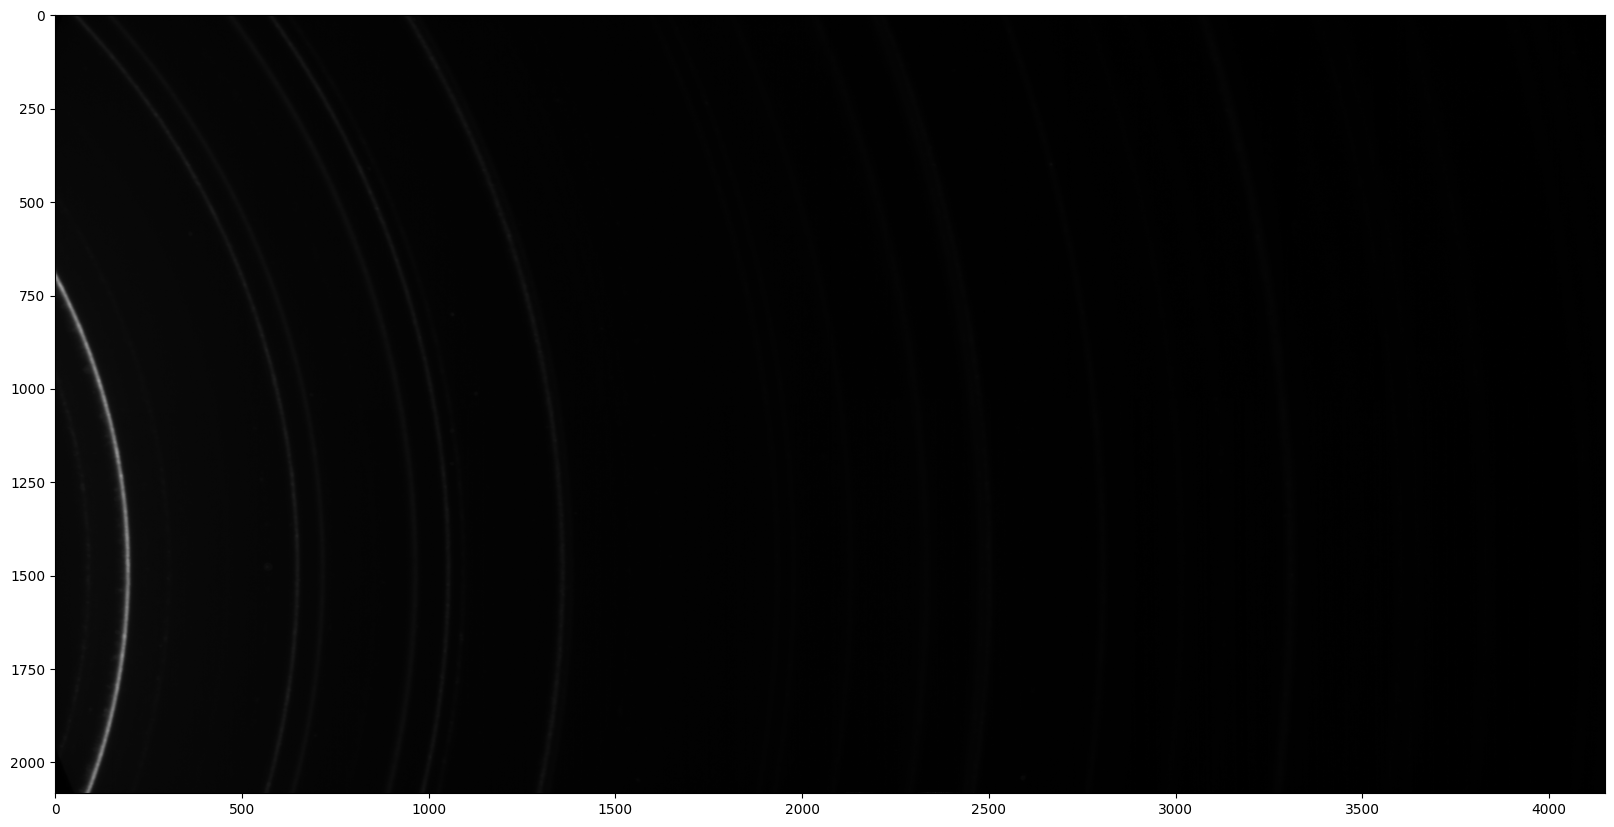

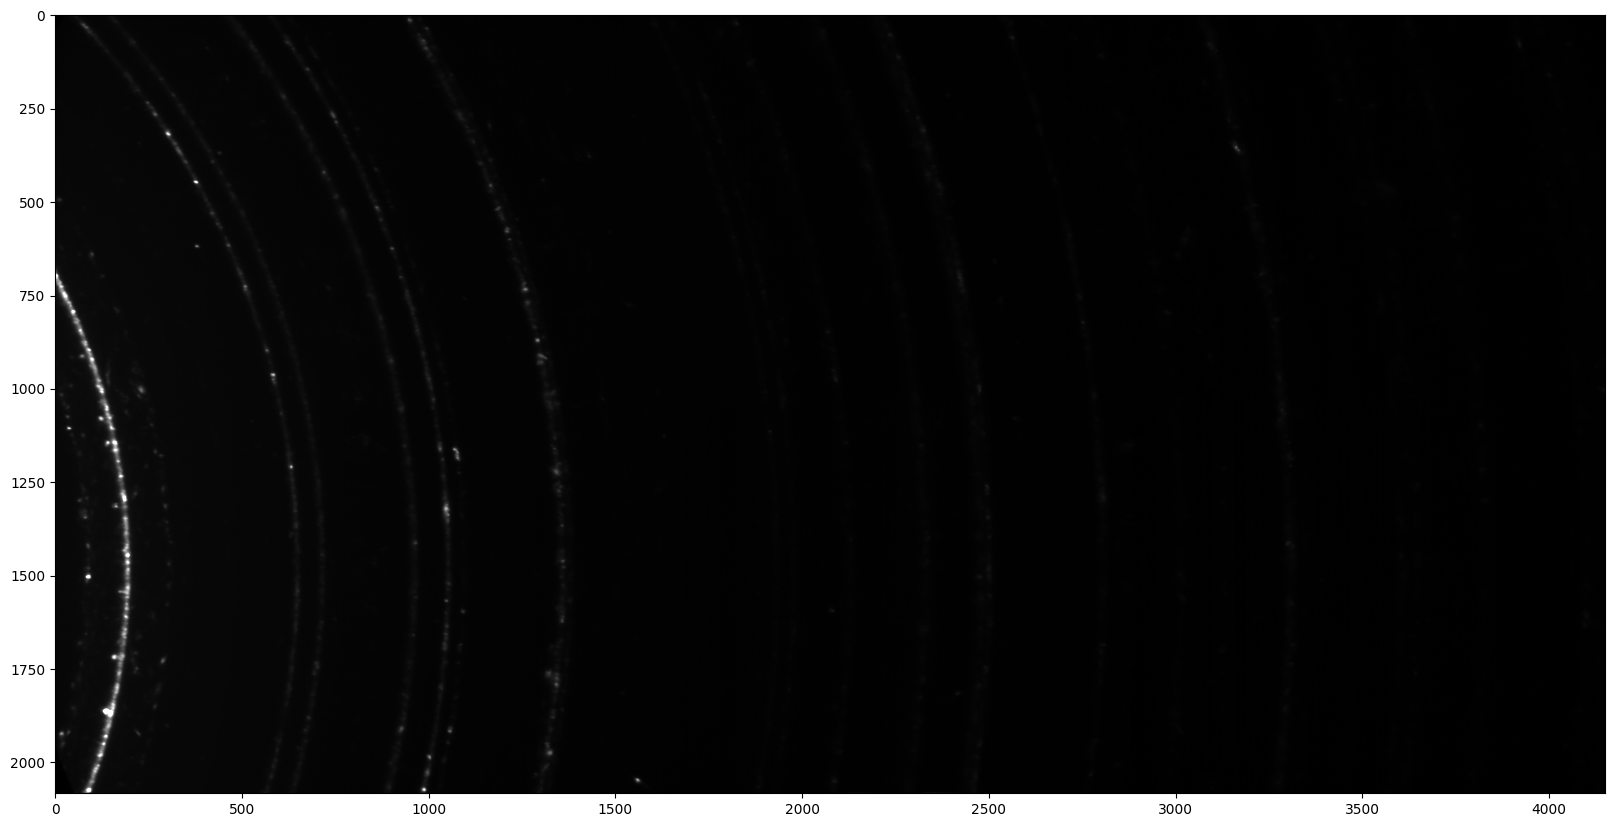

In [4]:
plt.figure(1, figsize=(20,20));plt.clf()
plt.imshow(im_powder, cmap='gray')
plt.clim(0, 500)
plt.show()

plt.figure(2, figsize=(20,20));plt.clf()
plt.imshow(im_spotty, cmap='gray')
plt.clim(0, 500)
plt.show()

It can clearly be seen that the second 2D diffraction pattern is very spotty. It is possible to suppress this spottiness by applying an trimmed mean filter. Here, we apply a 30 % trimmed mean filter and compare the three integrated diffraction patterns: 1) the spots-free pattern after azimuthal integration, 2) the spotty pattern after azimuthal integration without filter and 3) the spotty pattern after azimuthal integration using a 30% trimmed mean filter.

  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/home/antonyvam/anaconda3/envs/ndtomo/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_

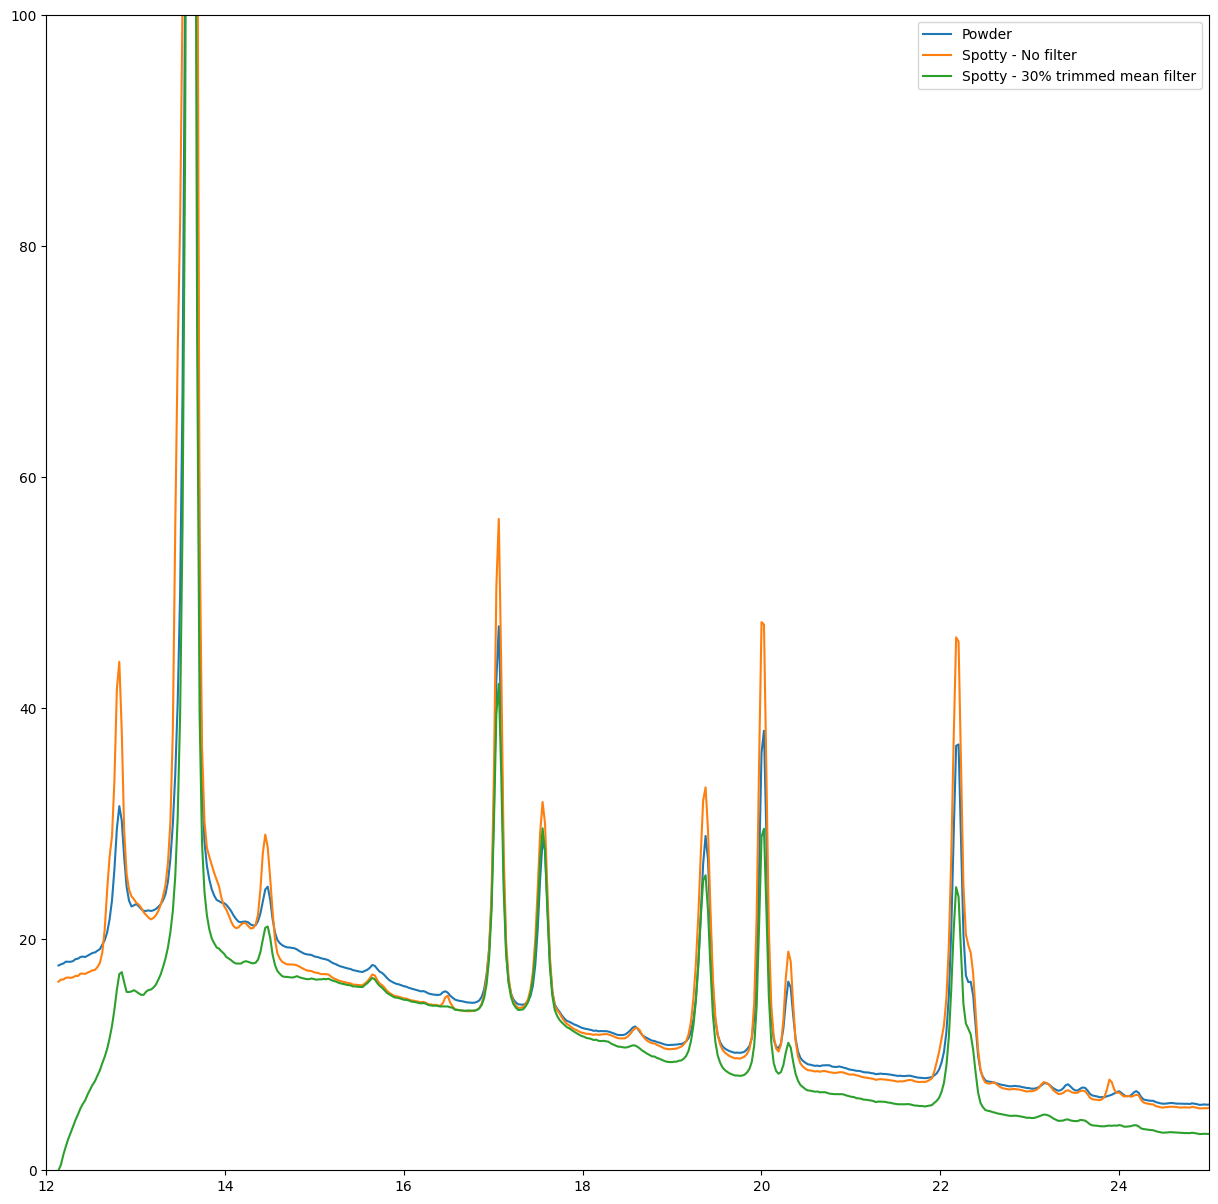

In [5]:
npt_rad = 1024

tth, I = ai.integrate1d(data=im_powder, npt=npt_rad, unit="2th_deg")
tth, I_spotty = ai.integrate1d(data =im_spotty, npt=npt_rad, unit="2th_deg")
tth_filt, I_filt = ai.medfilt1d(data=im_spotty, npt_rad=npt_rad, unit="2th_deg", percentile=(15,85))

plt.figure(2, figsize=(15,15));plt.clf()
plt.plot(tth,I)
plt.plot(tth,I_spotty)
plt.plot(tth_filt,I_filt)
plt.legend(['Powder', 'Spotty - No filter', 'Spotty - 30% trimmed mean filter'])
plt.xlim(12, 25)
plt.ylim(0, 100)
plt.show()


We can see that the application of the trimmed mean filter leads to a 1D diffraction pattern that is much more similar to the powder pattern, in terms of relative peak intensities, compared to the one obtained without any filters.

In the collage below, we can see four image reconstructions (bottom row) from four corresponding sinograms (top row). It can be clearly seen that the spots present in the BaWO4 sinogram lead to line or strak artefacts in the reconstructed image.

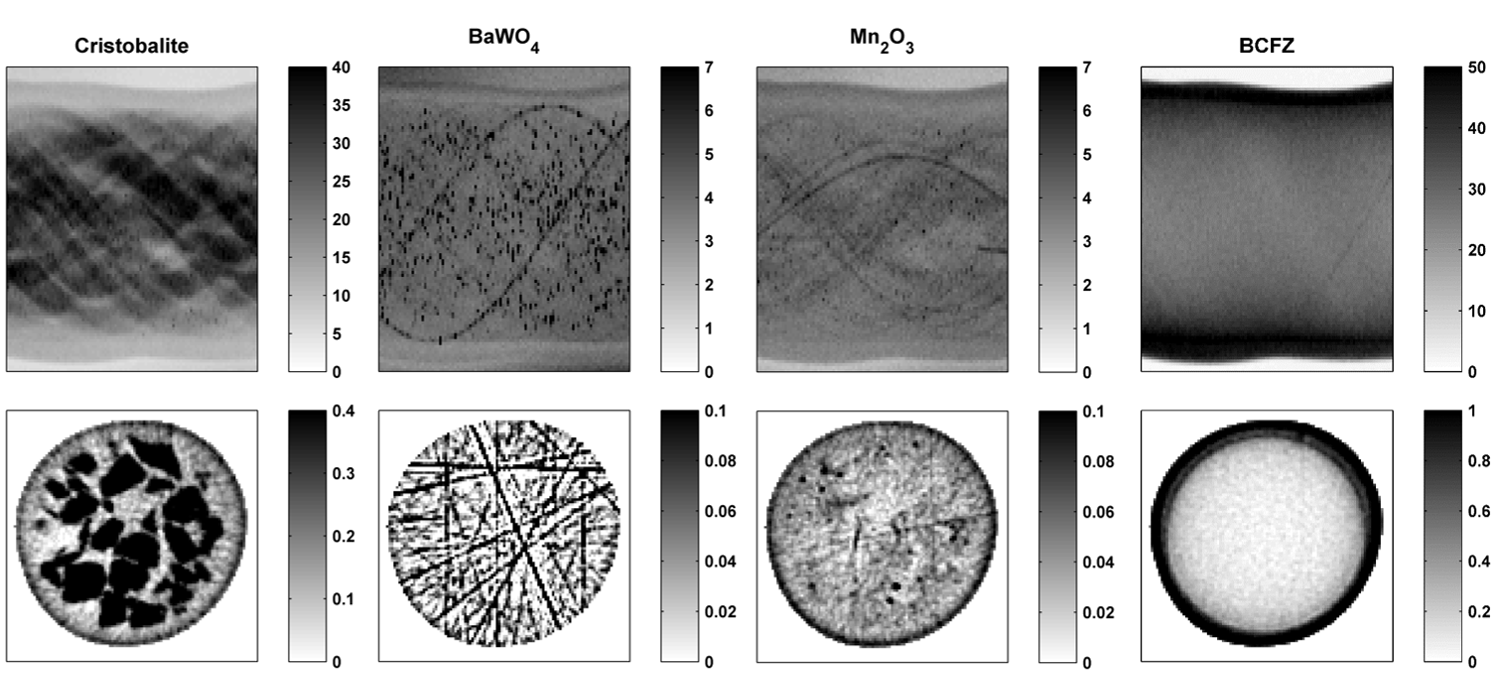

In [6]:
from IPython.display import Image
Image(filename="../_static/filt_1.png")

The application of a light trimmed mean filter (3% in this case) in the raw 2D diffraction patterns during integration (polar transformed images) was able to remove these spots and lead to artefact-free reconstructed images.

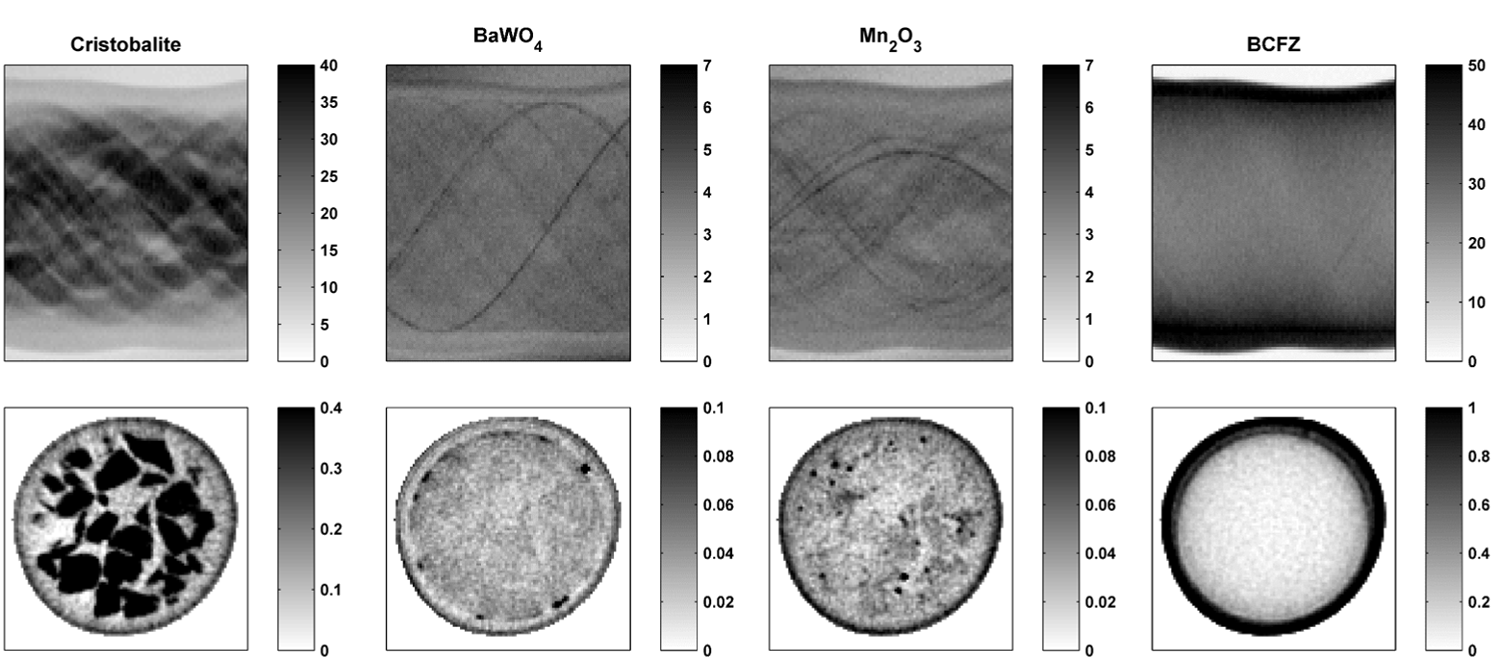

In [7]:
Image(filename="../_static/filt_2.png")

A second example is provided in the collage below. It can be seen here that all sinograms suffer at some extent from the presence of spots.

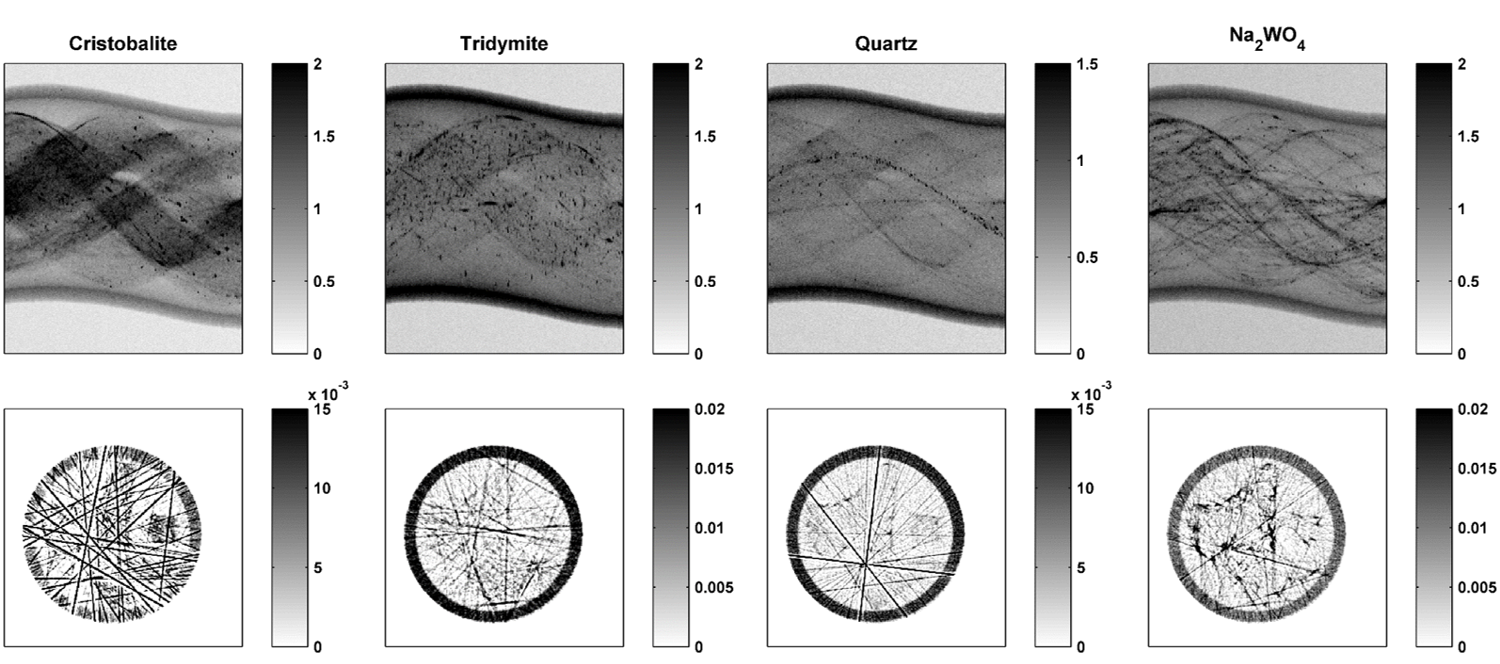

In [8]:
Image(filename="../_static/filt_3.png")

Similarly to the previous example, the application of a light trimmed mean filter was able to remove these spots and lead to artefact-free reconstructed images. It is now possible to observe the spatial distribution of all phases.

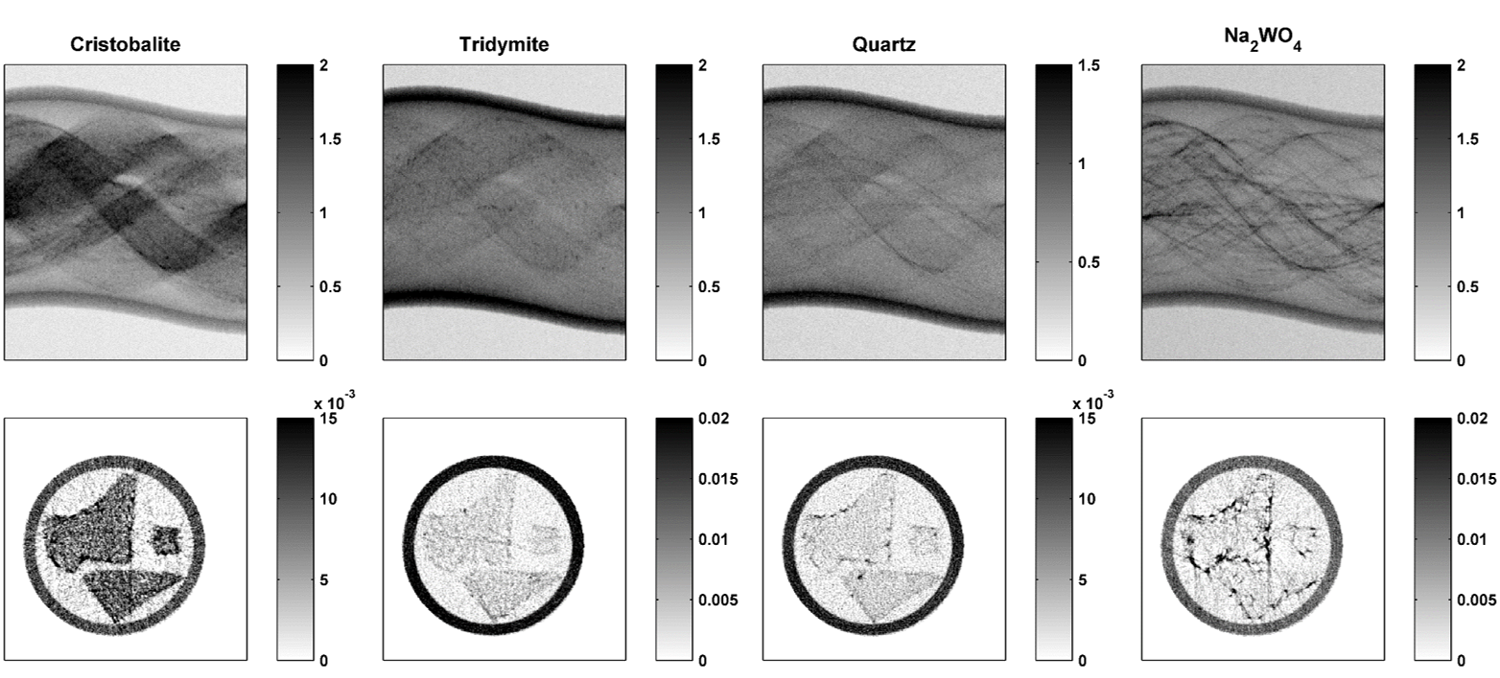

In [9]:
Image(filename="../_static/filt_4.png")